In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/consumption_temp.csv')


/opt/homebrew/Caskroom/miniconda/base/envs/TDT4225/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/TDT4225/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/TDT4225/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/TDT4225/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

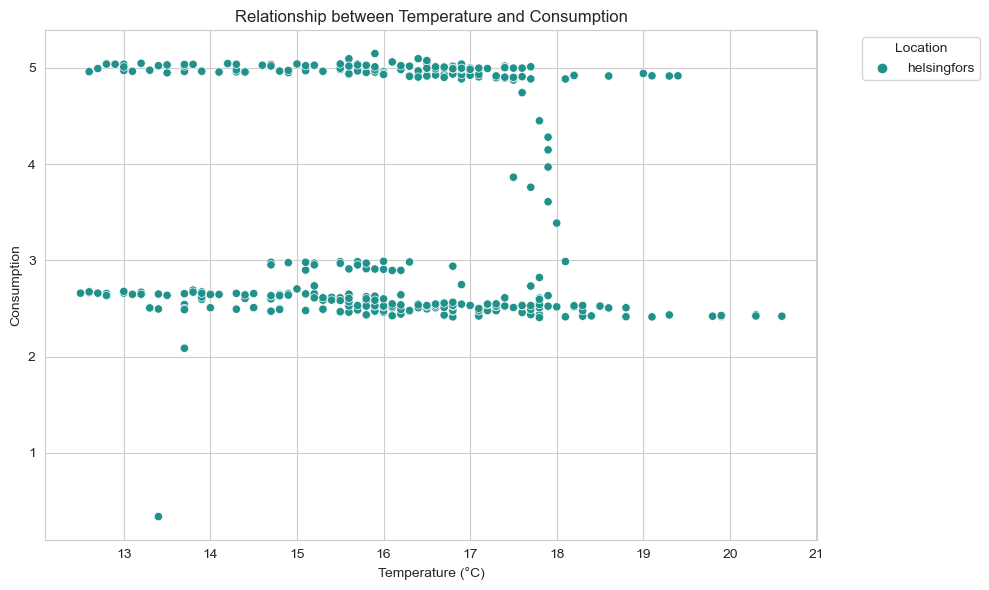

0.002482023013597065


In [2]:
### Some data cleaning...
# Due to the temporal nature of the data, we fill null values for Helsingfors' 
# consumption 
# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

### CHECK LINEAR RELATIONSHIP BETWEEN TEMPERATURE AND CONSUMPTION ###

# Set aesthetic style of the plots
sns.set_style("whitegrid")

df = df[df['location'] == 'helsingfors']
# All 0.0 values can be found in the summer, remove null values to check
# linear relationship between temperature and consumption in Helsingfors
df = df[df['consumption'] != 0.0]

# Filter for only summer months (June, July, August) or July specifically
df = df[df['time'].dt.month.isin([7])]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='temperature', y='consumption', hue='location', palette='viridis')

# Title and labels
plt.title('Relationship between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

# Looking at all data: -0.6006142130246995
# Looking only at summer seasonal data for Helsingfors: 0.3554700122738987
# Only for July: 0.002482023013597065
# Ergo, not really a linear relationship.. or not only between temperature and 
# consumption
# However, we do not have access to previous consumption data for these 0.0 
# values
# Best course of action may therefore be to forward fill using the consumption 
# same time the week after
correlation = df['temperature'].corr(df['consumption'])
print(correlation)


In [3]:
# Forward fill null values for Helsingfors' consumption

df = pd.read_csv('./data/consumption_temp.csv')

# Assuming 'df' is your DataFrame and it has columns 'Consumption' and 'Location'
df['consumption'] = df.groupby('location')['consumption'].transform(lambda x: x.replace(0.0, np.nan)) # replace 0.0 with NaN for using fillna()
df['consumption'] = df.groupby('location')['consumption'].transform(lambda x: x.fillna(x.shift(-168))) # shift data from the next week

df.to_csv('./data/consumption_temp_cleaned.csv', index=False)
